In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('classic')

import seaborn as sns

% matplotlib inline
% load_ext autoreload
% autoreload 2

In [2]:
data= pd.read_csv('/data/Good data storage.csv')
data.head()

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
0,2016072704,27,3,0,0,0,1,"26,27,28,29","31,32,33,34,35",1,0,NaN,50Hz IE preonly
1,2017021501,30,3,0,0,0,2,"12,13","16,17",1,0,NaN,50Hz IE preonly
2,2016091403,30,2,0,0,0,1,"14,15","17,18",1,1,NaN,50Hz IE preonly
3,2017062202,24,1,0,0,0,1,"30,31,32","34,35",1,0,"No change, good data",50Hz IE preonly
4,2016072902,29,1,0,1,0,0,43,"45,46,47,48,49",1,0,NaN,50Hz IE preonly


In [3]:
data_pre_50_hypo_reci = data[(data['Ptl_note']=='EI_antihebbian') & (data['Reci']==1)]
data_pre_50_hypo_uni = data[(data['Ptl_note']=='EI_antihebbian') & (data['Reci']==0)]

In [4]:
data_pre_50_hypo_reci

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
72,2016072902,29,2,1,1,0,1,"18,19,20","25,26,27,28,29,30",9,2,"Big amp, weak LTD",EI_antihebbian
73,2017051601,34,2,1,1,0,1,11,"19,20,21,22",9,21,"Small amp, strong LTD",EI_antihebbian
74,2017060801,31,1,1,1,0,1,5,"7,8",9,3,Big reciporal connection,EI_antihebbian
75,2017051202,28,2,1,1,0,1,17,20,9,17,"Super big amplitude, strong depression",EI_antihebbian
76,2017071201,28,2,1,1,1,1,"11,12","14,15",9,9,"small, strong LTD",EI_antihebbian
78,2017071301,29,1,1,1,0,1,"15,16,17",20,9,21,"small amp, No LTD",EI_antihebbian
101,2017062803,24,2,1,1,0,1,"5,6","8,9,10",12,0,NaN,EI_antihebbian


In [5]:
data_pre_50_hypo_reci.drop([74], inplace=True)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [6]:
data_pre_50_hypo_uni

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
71,2017060502,27,1,1,0,1,1,6,8,9,7,"Big amp, weak lTD",EI_antihebbian


<Container object of 3 artists>

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


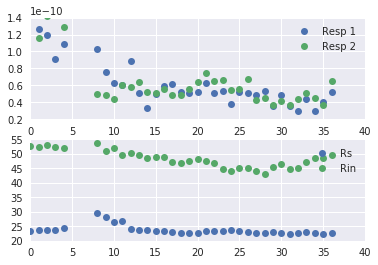

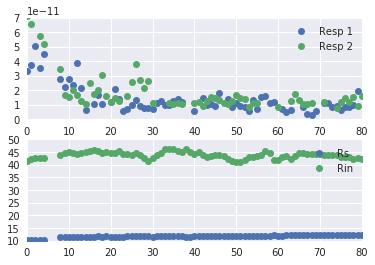

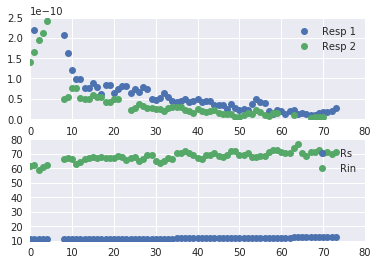

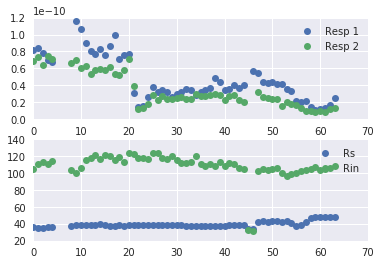

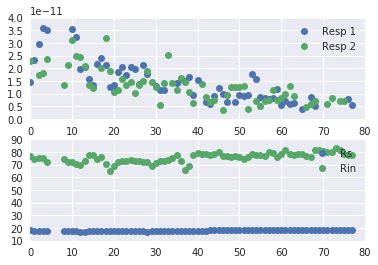

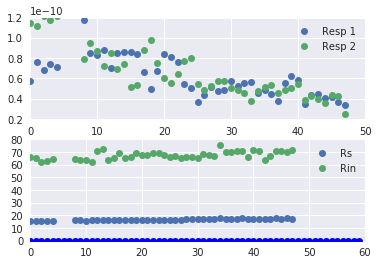

In [7]:
# patch_pip.df_ana(data_pre_50_hypo_reci,'/data/data_pre_50_hypo_reci',end_ana =[35, 60, 60, 50, 60, 40])
patch_pip.df_ana(data_pre_50_hypo_reci,'/data/data_pre_50_hypo_reci')
data_pre_50_hypo_reci = pd.read_pickle('/data/data_pre_50_hypo_reci')
ave_ptl_mean, ave_ptl_ste = patch_pip.sample_plot(data_pre_50_hypo_reci)
plt.errorbar(x=np.arange(len(ave_ptl_mean)), y=ave_ptl_mean, yerr=ave_ptl_ste, fmt='bo')

In [8]:
data_pre_50_hypo_reci['Before'].index

Int64Index([72, 73, 75, 76, 78, 101], dtype='int64')

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


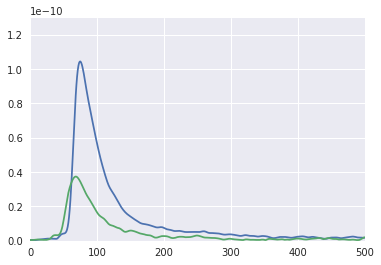

In [9]:
sample_id = 72
plt.plot(np.nanmean(np.vstack(data_pre_50_hypo_reci['Before'].loc[sample_id]['trace_y1'])[:, :500], axis=0))
plt.plot(np.nanmean(np.vstack(data_pre_50_hypo_reci['After'].loc[sample_id]['trace_y1'])[-5:,:500], axis=0))

plt.ylim([0, 1.3e-10])
with PdfPages('/data/Figure1A_10.pdf') as pdf:
    pdf.savefig()

In [10]:
elimi = np.array([35, 60, 60, 50, 60, 30])
elimi_sr = pd.Series(elimi, index=data_pre_50_hypo_reci.index)
data_pre_50_hypo_reci['elimi']=elimi_sr

In [11]:
# joint_sr = pd.Series(joint_sr, index=post_50Hz_reci.index)
data_pre_50_hypo_reci.to_pickle('/data/ana_pre_50_hypo_reci')